# <font color = Crimson size = 6> <b>Группировка данных. Корреляционный анализ</b> </font>

<u>**Группировка**</u> – это разделение статистической совокупности (генеральной или выборочной) на группы по одному или бОльшему количеству признаков.

**Виды группировок**:
* типологическая группировка
* структурная группировка
* аналитическая группировка
* комбинационная группировка

In [56]:
from math import log10
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

***
## <font color = DarkGreen size = 5> <b>Общая, групповые, внутригрупповая и межгрупповая дисперсия</b> </font>

<u>**Внутригрупповая дисперсия**</u> – это средневзвешенная арифметическая групповых дисперсий: \
$\bar{\sigma^2} = \cfrac{\sum{\sigma_i^2 n_i}}{n}$

>Внутригрупповая дисперсия характеризует среднюю (средневзвешенную) вариацию значений $x_i$ по группам.

<u>**Межгрупповая дисперсия**</u> – это дисперсия групповых средних относительно общей средней: \
$\delta^2 = \cfrac{\sum{(\bar{x_i}-\bar{x})^2 n_i}}{n}$

> Межгрупповая дисперсия характеризует меру разброса групповых средних относительно общей средней. Чем эта дисперсия больше, тем дальше расположены групповые средние $\bar{x_i}$ (многие из них) относительно общей средней $\bar{x}.$

Для общей, внутригрупповой и межгрупповой дисперсий справедливо так называемое **правило сложения дисперсий**: \
$\sigma^2 = \bar{\sigma^2} + \delta^2$, \
то есть общая дисперсия равна сумме внутригрупповой и межгрупповой дисперсии.

Общая дисперсия $\sigma^2$ характеризует *меру вариации* всей совокупности, т.е. **общая дисперсия учитывает все причины (факторы), которые обуславливают вариацию**.

**Межгрупповая дисперсия характеризует вариацию, обусловленную фактором, который лёг в основу группировки.**

**Внутригрупповая дисперсия отражает вариацию, обусловленную другими факторами.**

***
## <font color = DarkGreen size = 5> <b>Эмпирические показатели</b> </font>

***
### <font color = MediumBlue size = 4> <b>Эмпирический коэффициент детерминации</b> </font>

Чтобы оценить СУЩЕСТВЕННОСТЬ ВЛИЯНИЯ фактора, который лёг в основу группировки рассчитывают **эмпирический коэффициент детерминации** (*причинности*), равный отношению *межгрупповой* дисперсии к дисперсии *общей*: \
$\eta^2 = \cfrac{\delta^2}{\sigma^2}$

> Этот коэффициент характеризует долю вариации, объяснённую группировочным фактором.

Эмпирический коэффициент детерминации изменяется в пределах $0 \leq \eta^2 \leq 1$.

Чем $\eta^2$ ближе к единице, тем сильнее влияние группировочного фактора на вариацию статистической совокупности, тем больше межгрупповая дисперсия $\delta_y^2$ и меньше $\bar{\sigma_y^2}$. Высокое значение $\delta_y^2$ говорит о том, что групповые средние $\bar{y_i}$ знАчимо отличаются от общей средней $\bar{y}$, то есть изменение значений $x$ приводит к существенному изменению значений $y$. Иными словами, признак-фактор действительно оказывает сильное влияние. При этом внутригрупповая дисперсия $\bar{\sigma_y^2}$ будет малА и частоты в серой области примут выраженный диагональный вид.

Если $\eta^2=1$, то речь идёт о строгой функциональной зависимости, в этом случае $\sigma^2 = \delta^2$, то есть внутригрупповая дисперсия (по правилу сложения) равна нулю: $\bar{\sigma^2}=0$, и это в свою очередь означает, что в каждой группе находятся одинаковые и строго определённые значения (т.е. вариация по группам отсутствует).

Чем ближе $\eta^2$ к нулю, тем влияние группировочного фактора меньше. Математически это означает, что межгрупповая дисперсия $\delta^2$ слишком малА, а это в свою очередь значит, что групповые средние $\bar{x_i}$ расположены очень близко к общей средней $\bar{x}$. При этом внутригрупповая дисперсия $\bar{\sigma_y^2}$ будет большой – это значит, что дисперсия в группах существенна и частоты в столбцах более разбросаны – фактически они заполнят всю область. Если мы провели группировку и получили примерно одинаковые средние по группам, то влияние фактора явно слабО. Но это ещё не значит, что сам фактор не важный.


***
### <font color = MediumBlue size = 4> <b>Эмпирическое корреляционное отношение</b> </font>

Для оценки силы влияния фактора используют **эмпирическое корреляционное отношение**: \
$\eta = \sqrt{\cfrac{\delta^2}{\sigma^2}} = \cfrac{\delta}{\sigma}$ – отношение соответствующих стандартных отклонений.

Данное отношение тоже изменяется в пределах $0 \leq \eta \leq 1$, и характеризует тесноту (силу) связи между признаками. Для качественной оценки этой силы часто используют так называемую шкалу Чеддока:

| Диапазон значений $\eta$ | Корреляционная зависимость $Y$ от $X$ |
| ----- | :----- |
| 0 - 0.1 | практически отсутствует |
| 0.1 - 0.3 | слабая |
| 0.3 - 0.5 | умеренная |
| 0.5 - 0.7 | заметная |
| 0.7 - 0.9 | сильная |
| 0.9 - 0.99 | очень сильная |
| 0.99 - 1 | практически функциональная |

***
### <font color = MediumBlue size = 4> <b>Поле корреляции и эмпирические линии регрессии</b> </font>

**Корреляционное поле** – это множество точек с абсциссами $x_i$ и ординатами $\bar{y_j}$ которые соответствуют ненулевым значениям частот $n_{ij}$.

В статистическом смысле **регрессия** – это зависимость средних значений $\bar{y_i}$ признака-результата от соответствующих значений $x_i$ признака-фактора.

**Эмпирическая линия регрессии** $Y$ к $X$ – это ломаная, соединяющая точки $(x_i;\bar{y_i})$

Эмпирическая линия регрессии используется не только для наглядного изображения корреляционной зависимости, но и для интерполяции промежуточных значений.

Существует два «комплекта» коэффициентов $\eta^2$, $\eta$ и две линии регрессии. Это обусловлено тем, что встречаются ситуации, где признаки $X$, $Y$ взаимно влияют друг на друга.

**Первый комплект:** \
$\eta_{yx}^2 = \cfrac{\delta_y^2}{\sigma_y^2}$, $\eta_{yx} = \cfrac{\delta_y}{\sigma_y}$ – коэффициенты, которые показывают степень зависимости $Y$ от $X$. \
Графическое изображение зависимости – эмпирическая линия регрессии $Y$ к $X$ – ломаная, соединяющая точки $(x_i;\bar{y_i})$.

**Второй комплект:** \
$\eta_{xy}^2 = \cfrac{\delta_x^2}{\sigma_x^2}$, $\eta_{xy} = \cfrac{\delta_x}{\sigma_x}$ – коэффициенты, характеризующие  зависимость $X$ от $Y$. \
Эмпирическая линия регрессии $X$ к $Y$ – есть ломаная, соединяющая точки $(\bar{x_j};y_j)$.

***
## <font color = DarkGreen size = 5> <b>Типологическая и структурная группировки</b> </font>

<u>**Типологическая группировка**</u> – это разделение неоднородной статистической  совокупности на качественно однородные группы.

Полученные группы исследуются по отдельности и сравниваются – как между собой, так и с общими показателями. \
При этом проводится <u>**структурная группировка**</u> – это разделение качественно однородной совокупности по какому-либо вариационному признаку. \
Довольно часто грань между типологической и структурной группировкой стирается.

>Следует отметить, что при кажущейся простоте провести подобную группировку бывает не так-то просто. Трудность состоит в том, чтобы грамотно выделить различные категории (типы), и для этого, порой, исследуют целый комплекс показателей.

##### <font color = SlateBlue size = 3> Пример </font>

**В результате выборочного исследования 30 станков рассчитаны их относительные показатели металлоёмкости (т/кВт).**

In [2]:
X = np.array([6, 3.3333, 0.3333, 0.15, 1.2609, 0.875, 0.5789, 2, 2.1419, 0.8182, 1.1818, 3.75, 0.5556, 0.6923,
              2.5, 2.1667, 1.4286, 0.5, 8, 2.3333, 1.6667, 0.4, 2.6667, 1.6667, 1.2, 0.5, 2, 0.8571, 0.9333, 6])

n = X.shape[0]
print(f'{n = :.2f}')

n = 30.00


**1) вычислить общую среднюю и общую дисперсию**

In [3]:
Mx = np.mean(X)
print(f'{Mx = :.2f}')

Dx = np.var(X)
print(f'{Dx = :.2f}')

Mx = 1.95
Dx = 3.34


**2) выполнить структурную равноинтервальную группировку (*построить интервальный вариационный ряд с равными интервалами*)**

В условии ничего не сказано о количестве интервалов, и поэтому для определения их оптимального количества используем формулу Стерджеса: $k = 1 + 3.322\cdot\lg{n}$ – оптимальное количество интервалов, при этом результат округляют до ближайшего левого целого значения.

Длина интервала: $\displaystyle h = \frac{x_{max}-x_{min}}{k}$

In [4]:
from math import log10
import pandas as pd

k = int(1 + 3.322 * log10(n))
print(f'{k = :.2f}')

h = (X.max() - X.min())/k
print(f'{h = :.2f}')

Xdf = pd.DataFrame({'xi': X,
                    'int': pd.cut(pd.Series(X), bins = np.linspace(X.min(), X.max()+0.0001,6), right=False)})

df = Xdf.groupby(['int']).count().rename(columns={'xi': 'ni'})
df

k = 5.00
h = 1.57


,ni
int,
"[0.15, 1.72)",18
"[1.72, 3.29)",7
"[3.29, 4.86)",2
"[4.86, 6.43)",2
"[6.43, 8.0)",1


**3) выполнить структурную равнонаполненную группировку**

Это разбиение совокупности на группы с одинаковым (или примерно одинаковым) количеством объектов. Но интервалы здесь получатся разной длины.

Отсортируем числа по возрастанию и выделим 5 групп.

In [5]:
#np.reshape(np.sort(X),(5,6))
np.sort(X).reshape(5,-1)

array([[0.15  , 0.3333, 0.4   , 0.5   , 0.5   , 0.5556],
       [0.5789, 0.6923, 0.8182, 0.8571, 0.875 , 0.9333],
       [1.1818, 1.2   , 1.2609, 1.4286, 1.6667, 1.6667],
       [2.    , 2.    , 2.1419, 2.1667, 2.3333, 2.5   ],
       [2.6667, 3.3333, 3.75  , 6.    , 6.    , 8.    ]])

Некоторые значения логичнее перенести в соседние группы. Так, значение 0,5789 ближе к 1-й группе, а значение 2,6667 – к предпоследней группе.

In [6]:
df = pd.DataFrame(np.array_split(np.sort(X),[7,12,18,25]))#.T
#df.columns = list(range(1,6))
df

,0,1,2,3,4,5,6
0,0.1500,0.3333,0.4000,0.5000,0.5000,0.5556,0.5789
1,0.6923,0.8182,0.8571,0.8750,0.9333,NaN,NaN
2,1.1818,1.2000,1.2609,1.4286,1.6667,1.6667,NaN
3,2.0000,2.0000,2.1419,2.1667,2.3333,2.5000,2.6667
4,3.3333,3.7500,6.0000,6.0000,8.0000,NaN,NaN


**4) выбрать наиболее удачную группировку и вычислить выборочные средние**

Очевидно, что равнонаполненная группировка более удачна.

In [7]:
df['Mx'] = df.iloc[:, 0:7].mean(axis=1)
df

,0,1,2,3,4,5,6,Mx
0,0.1500,0.3333,0.4000,0.5000,0.5000,0.5556,0.5789,0.431114
1,0.6923,0.8182,0.8571,0.8750,0.9333,NaN,NaN,0.835180
2,1.1818,1.2000,1.2609,1.4286,1.6667,1.6667,NaN,1.400783
3,2.0000,2.0000,2.1419,2.1667,2.3333,2.5000,2.6667,2.258371
4,3.3333,3.7500,6.0000,6.0000,8.0000,NaN,NaN,5.416660


**5) вычислить групповые дисперсии, внутригрупповую дисперсию и межгрупповую дисперсию**

In [8]:
df['Dx'] = df.iloc[:, :7].var(axis=1, ddof=0)
df['ni'] = df.iloc[:, :7].count(axis=1)
df

,0,1,2,3,4,5,6,Mx,Dx,ni
0,0.1500,0.3333,0.4000,0.5000,0.5000,0.5556,0.5789,0.431114,0.019484,7
1,0.6923,0.8182,0.8571,0.8750,0.9333,NaN,NaN,0.835180,0.006479,5
2,1.1818,1.2000,1.2609,1.4286,1.6667,1.6667,NaN,1.400783,0.041672,6
3,2.0000,2.0000,2.1419,2.1667,2.3333,2.5000,2.6667,2.258371,0.055173,7
4,3.3333,3.7500,6.0000,6.0000,8.0000,NaN,NaN,5.416660,2.894472,5


In [9]:
print(f'Общая дисперсия = {Dx:.4f}')

D = sum(df['Dx']*df['ni'])/n
print(f'Внутригрупповая дисперсия = {D:.4f}')

d = sum((df['Mx'] - Mx)**2 * df['ni'])/n
print(f'Межгрупповая дисперсия = {d:.4f}')

Общая дисперсия = 3.3402
Внутригрупповая дисперсия = 0.5092
Межгрупповая дисперсия = 2.8309


***
## <font color = DarkGreen size = 5> <b>Аналитическая группировка</b> </font>

Даны два вариационных ряда $X$ и $Y$. Показатель $X$ называется **факторным (причинным)** или **признаком-фактором**. Показатель $Y$ называется **результативным (следственным)** или **признаком-результатом**. Требуется установить наличие и характер корреляционной связи.

Под характером связи понимается её направление, при этом возможны следующие варианты:
* прямая связь («чем больше, тем больше»);
* обратная связь («чем больше, тем меньше»);
* отсутствие связи («чем больше, тем так же хаотично»).

**Аналитическая группировка** – позволяет выяснить наличие и направление корреляционной связи между признаком-фактором $X$ и признаком-результатом $Y$.

Прежде всего, нужно определить *признак-фактор* и *признак-результат*. Самостоятельно, на основе логических рассуждений. Тут же высказываем предположение о наличии и направлении предполагаемой *корреляционной связи*.

1. Сначала нужно упорядочить совокупность по признаку-фактору.
2. Выполнить группировку совокупности по признаку-фактору (можно стандартную равноинтервальную группировку).
3. Найти эмпирический коэффициент детерминации и связанное с ним эмпирическое корреляционное отношение.


##### <font color = SlateBlue size = 3> Пример </font>

**Имеются выборочные данные о выпуске продукции (млн. руб.) и прибыли (млн. руб.) по 30 предприятиям за некоторый период:**

**1) Методом аналитической группировки установите наличие и характер корреляционной связи между стоимостью произведенной продукции и прибылью.**

In [10]:
df = pd.DataFrame({'ncomp': list(range(1,31)),
                   'output': [65, 78, 41, 54, 66, 80, 45, 57, 67, 81, 92, 48, 59,  68, 83,
                              52, 62, 69, 85, 70, 71, 64, 72, 88, 73, 74, 96, 75, 101, 76],
                   'margin': [15.7, 18.0, 12.1, 13.8, 15.5, 17.9, 12.8, 14.2, 15.9, 17.6, 18.2, 13.0, 15.5, 16.2, 16.7,
                              14.6, 14.8, 16.1, 16.7, 15.8, 16.4, 15.0, 16.5, 18.5, 16.4, 16.0, 19.1, 16.3, 19.6, 17.2]
                  })

$X$ – выпуск продукции по предприятиям (в млн. руб.), $Y$ – прибыль по соответствующим предприятиям (тоже в млн. руб.). \
Гипотеза: общая тенденция состоит в том, что при увеличении выпуска продукции, увеличивается и средняя прибыль по предприятиям.

Упорядочим совокупность по признаку-фактору $X$: расположим предприятия по возрастанию выпуска продукции.

In [11]:
df = df.sort_values('output')

Теперь выполняем группировку совокупности – опять же по признаку-фактору (выпуску продукции). Используем стандартную равноинтервальную группировку. Оптимальное количество интервалов определим по формуле Стерджеса: $k = 1 + 3.322\cdot\lg{n}$

In [12]:
n = df.shape[0]
k = int(1 + 3.322 * log10(n))
k

5

Длина интервала: $\displaystyle h = \frac{x_{max}-x_{min}}{k}$

In [13]:
x_min, x_max = df['output'].min(), df['output'].max()
h = (x_max - x_min)/k
h

12.0

In [14]:
df['interval'] = pd.cut(df['output'], bins = [41,53,65,77,89,101.0001], right=False)

df_group = (df.groupby('interval')
            .agg({'output': 'count', 'margin': 'mean'})
            .reset_index()
            .rename(columns={'interval': 'output_int', 'output': 'ni', 'margin': 'My'})
           )
df_group

,output_int,ni,My
0,"[41.0, 53.0)",4,13.125000
1,"[53.0, 65.0)",5,14.660000
2,"[65.0, 77.0)",12,16.166667
3,"[77.0, 89.0)",6,17.566667
4,"[89.0, 101.0)",3,18.966667


**2) Измерьте тесноту корреляционной связи между стоимостью произведенной продукции и прибылью эмпирическим корреляционным отношением**

Насколько СИЛЬНО влияет факторный признак на результат, насколько теснА связь между факторами? \
Ответы на этот вопрос дают **эмпирический коэффициент детерминации** и связанное с ним **эмпирическое корреляционное отношение**.

**Эмпирический коэффициент детерминации**

Прибыль (признак-результат) варьируется под влиянием самых разных факторов, их может быть довольно много. И общая дисперсия $\sigma_y^2$ учитывает ВСЕ факторы, влияющие на изменение прибыли.

Мы разбили совокупность на группы, причём, в основу группировки был положен выпуск продукции (один из факторов). Существенность влияния ЭТОГО фактора измеряется межгрупповой дисперсией $\delta_y^2$. И эмпирический коэффициент детерминации $\eta^2 = \cfrac{\delta^2}{\sigma^2}$ показывает ДОЛЮ влияния группировочного признака – чем ближе этот коэффициент к единице, тем сильнее влияние причины на следствие.

**Эмпирическое корреляционное отношение**

$\eta = \sqrt{\cfrac{\delta^2}{\sigma^2}}$ характеризует тесноту (силу) связи между признаками.

In [15]:
# общая дисперсия
Dy = np.var(df['margin'])
Dy

3.1461

In [16]:
My = np.mean(df['margin'])

# Межгрупповая дисперсия
d = sum((df_group['My'] - My)**2 * df_group['ni'])/n
d

2.7785611111111117

In [17]:
# эмпирический коэффициент детерминации
eta2 = d / Dy
eta2

0.8831763488481331

In [18]:
# эмпирическое корреляционное отношение
eta = np.sqrt(eta2)
eta

0.9397746266249867

$\eta=0.94$, таким образом, прибыль предприятий очень сильно зависит от стоимости выпущенной продукции.

***
## <font color = DarkGreen size = 5> <b>Комбинационная группировка</b> </font>

**Комбинационная группировка** \
– это группировка статистической совокупности совместно по двум или бОльшему количеству признаков. Она позволяет выявить устройство совокупности и установить взаимосвязи между её признаками.

##### <font color = SlateBlue size = 3> Пример </font>

**Имеются выборочные данные о выпуске продукции (млн. руб.) и сумме прибыли (млн. руб.) по 30 предприятиям.**

**1) Определить признак-фактор и признак-результат и высказать предположение о наличии и направлении корреляционной зависимости между признаками.**

Признаком-фактором (причиной) является $X$ – выпуск продукции, а признаком-результатом (следствием) $Y$ – прибыль. При увеличении выпуска продукции, очевидно, растёт средняя прибыль предприятий, таким образом, предполагаемая корреляционная зависимость – прямая.

In [19]:
df = pd.DataFrame({'ncomp': list(range(1,31)),
                   'output': [65, 78, 41, 54, 66, 80, 45, 57, 67, 81, 92, 48, 59,  68, 83,
                              52, 62, 69, 85, 70, 71, 64, 72, 88, 73, 74, 96, 75, 101, 76],
                   'margin': [15.7, 18.0, 12.1, 13.8, 15.5, 17.9, 12.8, 14.2, 15.9, 17.6, 18.2, 13.0, 15.5, 16.2, 16.7,
                              14.6, 14.8, 16.1, 16.7, 15.8, 16.4, 15.0, 16.5, 18.5, 16.4, 16.0, 19.1, 16.3, 19.6, 17.2]
                  })

**2) Выполнить комбинационную группировку, разбив значения признака-фактора на 5 равных интервалов, а значения признака-результата – на 3 равных интервала.**

Упорядочим совокупность по признаку-фактору $X$: расположим предприятия по возрастанию выпуска продукции.

In [20]:
df.sort_values('output', inplace=True, ignore_index=True)

Теперь выполняем группировку совокупности – опять же по признаку-фактору (выпуску продукции). Используем стандартную равноинтервальную группировку. Оптимальное количество интервалов определим по формуле Стерджеса: $k = 1 + 3.322\cdot\lg{n}$

In [21]:
n = df.shape[0]
k = int(1 + 3.322 * log10(n))
k

5

Длина интервала: $\displaystyle h = \frac{x_{max}-x_{min}}{k}$

In [22]:
x_min, x_max = df['output'].min(), df['output'].max()
h = (x_max - x_min)/k
h

12.0

In [23]:
def intX(x):
    binsX = [[41,53],[53,65],[65,77],[77,89],[89,101.0001]]
    for i in binsX:
        if i[0] <= x < i[1]:
            return pd.Interval(left = i[0], right = int(i[1]), closed='left')

In [24]:
df['intX'] = df['output'].apply(intX)
df

,ncomp,output,margin,intX
0,3,41,12.1,"[41, 53)"
1,7,45,12.8,"[41, 53)"
2,12,48,13.0,"[41, 53)"
3,16,52,14.6,"[41, 53)"
4,4,54,13.8,"[53, 65)"
5,8,57,14.2,"[53, 65)"
6,13,59,15.5,"[53, 65)"
7,17,62,14.8,"[53, 65)"
8,22,64,15.0,"[53, 65)"
9,1,65,15.7,"[65, 77)"


Теперь в каждой группе нужно выделить подгруппы, условно говоря, предприятия с небольшой, средней и высокой прибылью (3 интервала по условию). Для этого берём исходные значения признака-результата (прибыли) и сортируем их по возрастанию.

In [25]:
df.sort_values('margin', inplace=True, ignore_index=True)

y_min, y_max = df['margin'].min(), df['margin'].max()
h = (y_max - y_min)/3
h

2.5000000000000004

In [26]:
def intY(y):
    binsY = [[12.1,14.6],[14.6,17.1],[17.1,19.6075]]
    for i in binsY:
        if i[0] <= y < i[1]:
            return pd.Interval(left = i[0], right = round(i[1],1), closed='left')

In [27]:
df['intY'] = df['margin'].apply(intY)
df

,ncomp,output,margin,intX,intY
0,3,41,12.1,"[41, 53)","[12.1, 14.6)"
1,7,45,12.8,"[41, 53)","[12.1, 14.6)"
2,12,48,13.0,"[41, 53)","[12.1, 14.6)"
3,4,54,13.8,"[53, 65)","[12.1, 14.6)"
4,8,57,14.2,"[53, 65)","[12.1, 14.6)"
5,16,52,14.6,"[41, 53)","[14.6, 17.1)"
6,17,62,14.8,"[53, 65)","[14.6, 17.1)"
7,22,64,15.0,"[53, 65)","[14.6, 17.1)"
8,13,59,15.5,"[53, 65)","[14.6, 17.1)"
9,5,66,15.5,"[65, 77)","[14.6, 17.1)"


In [28]:
def grey_zero(x):
    return np.where(x == 0, f"color: lightgrey ;", None)


df.pivot_table(
    index = 'intY',
    columns = 'intX',
    values = 'ncomp',
    aggfunc = 'count',
    fill_value = 0,
    margins=True
).style.apply(grey_zero, axis=None)

intX,"[41, 53)","[53, 65)","[65, 77)","[77, 89)","[89, 101)",All
intY,,,,,,
"[12.1, 14.6)",3,2,0,0,0,5
"[14.6, 17.1)",1,3,11,2,0,17
"[17.1, 19.6)",0,0,1,4,3,8
All,4,5,12,6,3,30


Если частоты имеют тенденцию располагаться по диагонали от левого верхнего до правого нижнего угла, то между признаками существует прямая корреляционная зависимость.

Если частоты имеют тенденцию располагаться по диагонали от левого нижнего до правого верхнего угла, то между признаками существует обратная корреляционная зависимость.

Если частоты расположены хаотично, без явной закономерности, то корреляционная зависимость отсутствует либо является слабой.

Сначала нужно перейти к дискретным рядам, выбрав в качестве вариант $x_i$ и $y_j$ середины соответствующих интервалов.

In [29]:
df['intX_mid'] = df['intX'].apply(lambda x: x.mid).astype(int)
df['intY_mid'] = df['intY'].apply(lambda x: x.mid).round(2)

df_pivot1 = df.pivot_table(
    index = 'intY_mid',
    columns = 'intX_mid',
    values = 'ncomp',
    aggfunc = 'count',
    fill_value = 0,
    margins=True
)

df_pivot1.style.apply(grey_zero, axis=None)

intX_mid,47,59,71,83,95,All
intY_mid,,,,,,
13.350000,3,2,0,0,0,5
15.850000,1,3,11,2,0,17
18.350000,0,0,1,4,3,8
All,4,5,12,6,3,30


Вычислим общую среднюю и общую дисперсию признака-результата

In [30]:
df_groupY = (df.groupby('intY_mid')
               .agg({'ncomp': 'count'})
               .reset_index()
               .rename(columns={'ncomp': 'mi'})
            )

My = sum(df_groupY['intY_mid'] * df_groupY['mi'])/n
My

16.1

In [31]:
Dy = sum((df_groupY['intY_mid'] - My)**2 * df_groupY['mi'])/n
Dy

2.6458333333333353

Для нахождения межгрупповой дисперсии вычислим групповые или, как их называют, **условные средние**.

In [32]:
df_pivot2 = df.pivot_table(
    index = ['intX_mid','intY_mid'],
    values = 'ncomp',
    aggfunc = 'count',
    fill_value = 0
    #margins=True
).reset_index()

df_pivot2['yn'] = df_pivot2['intY_mid'] * df_pivot2['ncomp']
df_pivot2

,intX_mid,intY_mid,ncomp,yn
0,47,13.35,3,40.05
1,47,15.85,1,15.85
2,59,13.35,2,26.70
3,59,15.85,3,47.55
4,71,15.85,11,174.35
5,71,18.35,1,18.35
6,83,15.85,2,31.70
7,83,18.35,4,73.40
8,95,18.35,3,55.05


In [33]:
df_groupX = (df_pivot2.groupby('intX_mid')
               .agg({'yn': 'sum', 'ncomp': 'sum'})
               .reset_index()
               .rename(columns={'ncomp': 'ni'})
            )

df_groupX['My'] = df_groupX['yn'] / df_groupX['ni']
df_groupX

,intX_mid,yn,ni,My
0,47,55.90,4,13.975000
1,59,74.25,5,14.850000
2,71,192.70,12,16.058333
3,83,105.10,6,17.516667
4,95,55.05,3,18.350000


Вычислим межгрупповую дисперсию

In [34]:
d = sum((df_groupX['My'] - My)**2 * df_groupX['ni'])/n
d

1.7708333333333357

Вычислим эмпирический коэффициент детерминации:

In [35]:
eta2 = d / Dy
eta2

0.6692913385826775

Таким образом, 66,93% вариации прибыли обусловлено изменением  выпуска продукции. Остальные 33,07% вариации обусловлены другими факторами.

**3) Построить эмпирические линии регрессии.**

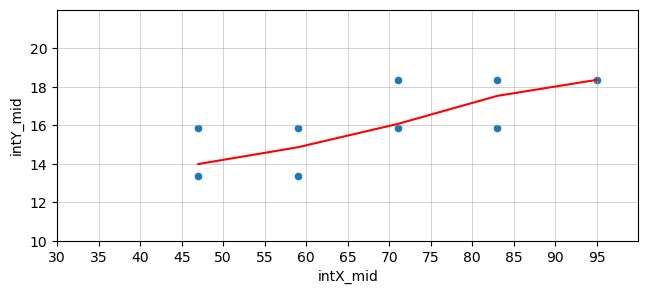

In [42]:
plt.figure(figsize=(7.5,3))

sns.scatterplot(x='intX_mid', y='intY_mid', data=df_pivot2)
sns.lineplot(x='intX_mid', y='My', data=df_groupX, color='r')

plt.xlim([30,100])
plt.xticks(ticks=np.arange(30, 100, 5))
plt.ylim([10,22])
plt.yticks(ticks=np.arange(10, 22, 2))
plt.grid(linewidth=0.4);

In [43]:
df_pivot2['xn'] = df_pivot2['intX_mid'] * df_pivot2['ncomp']

df_groupY = (df_pivot2.groupby('intY_mid')
               .agg({'xn': 'sum', 'ncomp': 'sum'})
               .reset_index()
               .rename(columns={'ncomp': 'ni'})
            )

df_groupY['Mx'] = df_groupY['xn'] / df_groupY['ni']
df_groupY

,intY_mid,xn,ni,Mx
0,13.35,259,5,51.800000
1,15.85,1171,17,68.882353
2,18.35,688,8,86.000000


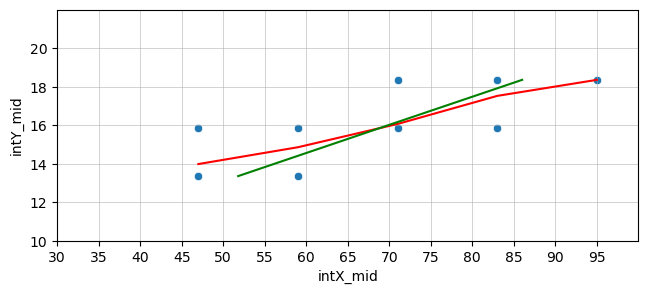

In [45]:
plt.figure(figsize=(7.5,3))

sns.scatterplot(x='intX_mid', y='intY_mid', data=df_pivot2)
sns.lineplot(x='intX_mid', y='My', data=df_groupX, color='r')
sns.lineplot(x='Mx', y='intY_mid', data=df_groupY, color='g')

plt.xlim([30,100])
plt.xticks(ticks=np.arange(30, 100, 5))
plt.ylim([10,22])
plt.yticks(ticks=np.arange(10, 22, 2))
plt.grid(linewidth=0.4);

***
## <font color = DarkGreen size = 5> <b>Корреляционная зависимость и причинно-следственная связь</b> </font>

Если между признаками $X$ и $Y$ существует сильная корреляционная зависимость, то это ещё не значит, что между ними есть взаимосвязь. Так, если мы возьмём два произвольных вариационных ряда, которые примерно одинаково растут (или убывают), то в любом случае получатся высокие значения $\eta^2$, $\eta$. При этом между признаками может вообще не быть никакой причинно-следственной связи.

Поэтому причинно-следственная зависимость признака $X$ и $Y$ должна быть предварительно обоснована если не экспертным путём, то хотя бы здравым смыслом.

С другой стороны, если коэффициенты $\eta^2$, $\eta$ близки к нулю (слабая корреляционная зависимость), то это ещё не значит, что между признаками нет причинно-следственной связи.

**Основная предпосылка использования корреляционного анализа состоит в том, что при изменении одного фактора – другой должен гипотетически** (по нашему предположению и обоснованию) **возрастать или убывать**.

Кроме того, величина $X$ может зависеть от $Y$ косвенно, опосредованно (через влияние третьего признака).

***
## <font color = DarkGreen size = 5> <b>Линейный коэффициент корреляции</b> </font>

**Линейный коэффициент корреляции** – это частный аналог эмпирического корреляционного отношения. Но в отличие от отношения, он показывает не только тесноту, но ещё и направление зависимости, ну и, конечно, здесь определена её форма (линейная).

***
### <font color = MediumBlue size = 4> <b>Ковариация / Корреляционный момент</b> </font>

**Ковариация** – это величина, определяющая [зависимость двух случайных величин](https://github.com/TanXmas/ProbabilityTheory_and_Statistics/blob/main/PT_04_System%20of%20two%20random%20variables.ipynb).

$\displaystyle cov_{xy} = M(XY) - M(X) \cdot M(Y)$, где \
$\displaystyle M(XY) = \sum_{i=1}^{n} \sum_{j=1}^{m} x_i y_j p_{ij}$, \
$\displaystyle M(X) = \sum_{i=1}^{n}{x_i p_i}$, \
$\displaystyle M(Y) = \sum_{j=1}^{m}{y_j p_j}$

Масштаб ковариации зависит от дисперсии, поэтому по ковариации нельзя судить о силе взаимосвязи СВ.

In [46]:
X = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
Y = np.array([27, 37, 42, 48, 57, 56, 77, 80])

In [47]:
np.mean(X*Y) - np.mean(X) * np.mean(Y)

11.662500000000023

In [48]:
np.cov(X, Y, ddof=0)

array([[  0.471875,  11.6625  ],
       [ 11.6625  , 301.      ]])

***
### <font color = MediumBlue size = 4> <b>Коэффициент корреляции</b> </font>

#### <font color = SteelBlue size = 3> <b>Коэффициент корреляции Пирсона</b> </font>

**Коэффициентом корреляции** $r_{xy}$ случайных величин $X$ и $Y$ называют отношение корреляционного момента к произведению  
средних квадратических отклонений этих величин: \
$r_{xy} = \cfrac{cov_{xy}}{\sigma_x \sigma_y}$

> Коэффициент корреляции независимых случайных величин равен нулю (т.к. $cov_{xy}=0$).

<br>

**Коэффициент корреляции безразмерен и принимает значения из промежутка: $-1\leq r_{xy} \leq 1$.**

Чем ближе $r_{xy}$ *по модулю* к $1$, тем теснее линейная взаимосвязь между величинами $X$ и $Y$.

Чем ближе $r_{xy}$ *по модулю* к $0$ – тем такая зависимость выражена меньше.

Взаимосвязь считается существенной, начиная примерно $|r_{xy}|=0.7$.

Крайним значениям $r_{xy}=-1$ и $r_{xy}=1$ соответствует строгая функциональная зависимость $y=kx+b$

Если $r<0$, то корреляционная связь **обратная**, а если $r>0$, то **прямая**.

In [49]:
cov = np.cov(X, Y, ddof=0)[1,0]
SDx = np.std(X, ddof=0)
SDy = np.std(Y, ddof=0)
cov / (SDx * SDy)

0.9785768205829909

In [50]:
cov = np.cov(X, Y, ddof=1)[1,0]
SDx = np.std(X, ddof=1)
SDy = np.std(Y, ddof=1)
cov / (SDx * SDy)

0.9785768205829907

In [51]:
np.corrcoef(X, Y)

array([[1.        , 0.97857682],
       [0.97857682, 1.        ]])

#### <font color = SteelBlue size = 3> <b>Коэффициент корреляции Спирмена</b> </font>

Коэффициент корреляции Спирмена называют ранговым коэффициентом корреляции. Он также показывает тесноту линейной связи, но в отличии от коэффициента корреляции Пирсона не требует нормальности распределений случайных величин и применяется для количественных и  порядковых данных.

In [52]:
X = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
Y = np.array([27, 37, 42, 48, 57, 56, 77, 80])

In [53]:
n = X.shape[0]
df = pd.DataFrame({'X': X, 'Y': Y})
df['Xr'] = df['X'].rank()
df['Yr'] = df['Y'].rank()
df

,X,Y,Xr,Yr
0,1.2,27,1.0,1.0
1,1.6,37,2.0,2.0
2,1.8,42,3.5,3.0
3,1.8,48,3.5,4.0
4,2.5,57,5.0,6.0
5,2.6,56,6.0,5.0
6,3.0,77,7.0,7.0
7,3.3,80,8.0,8.0


In [54]:
np.corrcoef(df['Xr'], df['Yr'])

array([[1.        , 0.97007727],
       [0.97007727, 1.        ]])

In [57]:
stats.spearmanr(X, Y)

SpearmanrResult(correlation=0.9700772721497398, pvalue=6.548558831120599e-05)

#### <font color = SteelBlue size = 3> <b>Условия применимости коэффициентов корреляции</b> </font>

| Коэффициент корреляции Пирсона | Коэффициент корреляции Спирмена |
| :--- | :--- |
| параметрический метод | непараметрический метод |
| нормальность | распределение может быть отличным от нормального |
| количественные данные | количественные и порядковые признаки |

#### <font color = SteelBlue size = 3> <b>Интерпретация коэффициента корреляции</b> </font>

| Значение $|r|$ | Интерпретация линейной зависимости |
| --- | :--- |
| 0 - 0.1   | нет линейной зависимости |
| 0.1 - 0.3 | очень слабая |
| 0.3 - 0.5 | слабая |
| 0.5 - 0.7 | средняя (заметная) |
| 0.7 - 0.9 | сильная |
| 0.9 - 1   | очень сильная |